<a href="https://colab.research.google.com/github/Abhiram88/vaccination/blob/main/H1N1_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install dataprep

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import datetime
import os

import numpy as np
from dataprep.eda.missing import plot_missing

from sklearn.model_selection import train_test_split



NumExpr defaulting to 2 threads.


In [4]:
training_features_url = 'https://raw.githubusercontent.com/Abhiram88/vaccination/main/training_set_features.csv'
training_label_url = 'https://raw.githubusercontent.com/Abhiram88/vaccination/main/training_set_labels.csv'
test_features_url = 'https://raw.githubusercontent.com/Abhiram88/vaccination/main/test_set_features.csv'

In [5]:
training_features = pd.read_csv(training_features_url)
training_labels = pd.read_csv(training_label_url)

test_features = pd.read_csv(test_features_url)

In [6]:
training_features.head()

respondent_id  h1n1_concern  ...  employment_industry  employment_occupation
0              0           1.0  ...                  NaN                    NaN
1              1           3.0  ...             pxcmvdjn               xgwztkwe
2              2           1.0  ...             rucpziij               xtkaffoo
3              3           1.0  ...                  NaN                    NaN
4              4           2.0  ...             wxleyezf               emcorrxb

[5 rows x 36 columns]

In [ ]:
training_labels.head()

respondent_id  h1n1_vaccine  seasonal_vaccine
0              0             0                 0
1              1             0                 1
2              2             0                 0
3              3             0                 1
4              4             0                 0

In [ ]:
training_features.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

  0%|                                                                                          | 0/353 [00:00<…


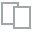
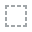
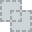
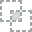
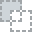
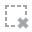
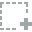
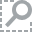
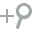
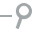
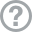
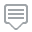
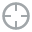
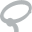
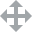
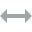
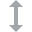
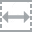
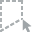
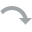
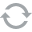
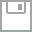
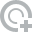
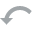
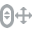
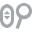
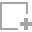
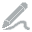
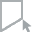
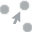
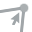
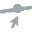

In [ ]:
plot_missing(training_features)

In [ ]:
'''
training_features["h1n1_concern"].fillna(value=2.0, inplace = True)
test_features["h1n1_concern"].fillna(value=2.0, inplace = True)

training_features["h1n1_knowledge"].fillna(value=1.0, inplace = True)
test_features["h1n1_knowledge"].fillna(value=1.0, inplace = True)

training_features["behavioral_antiviral_meds"].fillna(value=0.0, inplace = True)
test_features["behavioral_antiviral_meds"].fillna(value=0.0, inplace = True)

training_features["behavioral_avoidance"].fillna(value=1.0, inplace = True)
test_features["behavioral_avoidance"].fillna(value=1.0, inplace = True)

training_features["behavioral_face_mask"].fillna(value=0.0, inplace = True)
test_features["behavioral_face_mask"].fillna(value=0.0, inplace = True)

training_features["behavioral_wash_hands"].fillna(value=1.0, inplace = True)
test_features["behavioral_wash_hands"].fillna(value=1.0, inplace = True)

training_features["behavioral_large_gatherings"].fillna(value=0.0, inplace = True)
test_features["behavioral_large_gatherings"].fillna(value=0.0, inplace = True)

training_features["behavioral_outside_home"].fillna(value=0.0, inplace = True)
test_features["behavioral_outside_home"].fillna(value=0.0, inplace = True)

training_features["behavioral_touch_face"].fillna(value=1.0, inplace = True)
test_features["behavioral_touch_face"].fillna(value=1.0, inplace = True)


training_features["doctor_recc_h1n1"].fillna(value=0.0, inplace = True)
test_features["doctor_recc_h1n1"].fillna(value=0.0, inplace = True)

training_features["doctor_recc_seasonal"].fillna(value=0.0, inplace = True)
test_features["doctor_recc_seasonal"].fillna(value=0.0, inplace = True)

training_features["chronic_med_condition"].fillna(value=0.0, inplace = True)
test_features["chronic_med_condition"].fillna(value=0.0, inplace = True)

training_features["child_under_6_months"].fillna(value=0.0, inplace = True)
test_features["child_under_6_months"].fillna(value=0.0, inplace = True)

training_features["health_worker"].fillna(value=0.0, inplace = True)
test_features["health_worker"].fillna(value=0.0, inplace = True)
'''

In [ ]:
training_features.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [7]:
non_object_columns = training_features._get_numeric_data().columns.to_list()

In [8]:
non_object_columns

['respondent_id',
 'h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children']

In [9]:
for column in non_object_columns:
    median_value = round(training_features[column].median())
    training_features[column].fillna(value = median_value, inplace=True)


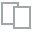
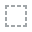
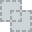
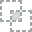
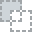
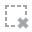
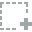
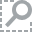
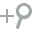
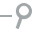
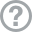
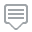
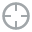
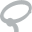
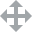
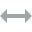
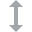
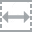
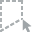
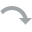
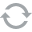
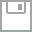
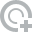
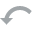
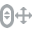
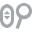
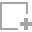
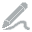
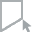
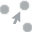
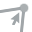
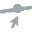

In [10]:
plot_missing(training_features)


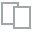
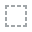
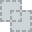
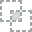
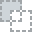
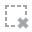
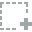
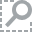
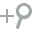
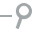
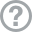
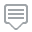
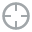
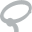
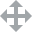
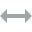
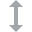
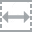
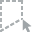
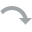
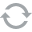
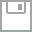
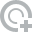
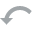
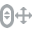
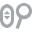
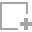
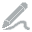
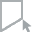
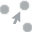
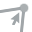
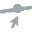

In [11]:
non_object_df = training_features.select_dtypes(include=['float64', 'int64'])
len(non_object_df.columns)
plot_missing(non_object_df)


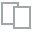
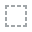
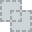
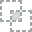
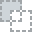
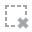
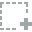
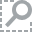
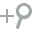
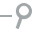
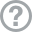
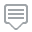
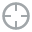
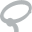
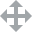
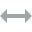
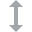
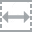
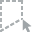
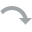
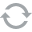
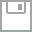
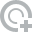
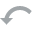
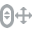
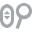
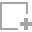
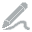
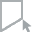
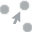
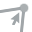
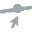

In [12]:
non_object_df = non_object_df.merge(training_labels, on='respondent_id')
plot_missing(non_object_df)

In [13]:
non_object_df.drop('respondent_id', axis=1, inplace=True)
non_object_df

h1n1_concern  h1n1_knowledge  ...  h1n1_vaccine  seasonal_vaccine
0               1.0             0.0  ...             0                 0
1               3.0             2.0  ...             0                 1
2               1.0             1.0  ...             0                 0
3               1.0             1.0  ...             0                 1
4               2.0             1.0  ...             0                 0
...             ...             ...  ...           ...               ...
26702           2.0             0.0  ...             0                 0
26703           1.0             2.0  ...             0                 0
26704           2.0             2.0  ...             0                 1
26705           1.0             1.0  ...             0                 0
26706           0.0             0.0  ...             0                 0

[26707 rows x 25 columns]

In [ ]:
non_object_df.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [14]:
h1_column = []
seasonal_column = []

for column in non_object_df.columns:
    if 'sea' not in column:
        h1_column.append(column)
for column in non_object_df.columns:
    if 'h1' not in column:
        seasonal_column.append(column)

In [17]:
h1_data = non_object_df[h1_column]
seasonal_data = non_object_df[seasonal_column]

In [20]:
h1_data.head()

h1n1_concern  h1n1_knowledge  ...  household_children  h1n1_vaccine
0           1.0             0.0  ...                 0.0             0
1           3.0             2.0  ...                 0.0             0
2           1.0             1.0  ...                 0.0             0
3           1.0             1.0  ...                 0.0             0
4           2.0             1.0  ...                 0.0             0

[5 rows x 20 columns]

In [18]:
h1_vaccine_1 = h1_data.loc[non_object_df['h1n1_vaccine'] == 1]
h1_vaccine_0 = h1_data.loc[non_object_df['h1n1_vaccine'] == 0]

sea_vaccine_1 = seasonal_data.loc[non_object_df['seasonal_vaccine'] == 1]
sea_vaccine_0 = seasonal_data.loc[non_object_df['seasonal_vaccine'] == 0]

In [31]:
def calculate_mean(x):
    return x.mean()

In [32]:
h1_vaccine_1_chart = h1_vaccine_1.apply(calculate_mean, axis=0)
h1_vaccine_0_chart = h1_vaccine_0.apply(calculate_mean, axis=0)

sea_vaccine_1_chart = sea_vaccine_1.apply(calculate_mean, axis=0)
sea_vaccine_0_chart = sea_vaccine_0.apply(calculate_mean, axis=0)

In [33]:
h1_vaccine_0_chart_labels = h1_vaccine_0_chart.index
h1_vaccine_0_chart_values = h1_vaccine_0_chart.values

h1_vaccine_1_chart_labels = h1_vaccine_1_chart.index
h1_vaccine_1_chart_values = h1_vaccine_1_chart.values

h1_vaccine_0_chart_labels = h1_vaccine_0_chart.index
h1_vaccine_0_chart_values = h1_vaccine_0_chart.values


sea_vaccine_1_chart_labels = sea_vaccine_1_chart.index
sea_vaccine_1_chart_values = sea_vaccine_1_chart.values


sea_vaccine_0_chart_labels = sea_vaccine_0_chart.index
sea_vaccine_0_chart_values = sea_vaccine_0_chart.values

In [34]:
h1_vaccine_0_chart

h1n1_concern                   1.562402
h1n1_knowledge                 1.223649
behavioral_antiviral_meds      0.044216
behavioral_avoidance           0.716921
behavioral_face_mask           0.059668
behavioral_wash_hands          0.811201
behavioral_large_gatherings    0.352969
behavioral_outside_home        0.330861
behavioral_touch_face          0.661627
doctor_recc_h1n1               0.120240
chronic_med_condition          0.251129
child_under_6_months           0.070651
health_worker                  0.081396
health_insurance               0.929634
opinion_h1n1_vacc_effective    3.713926
opinion_h1n1_risk              2.124994
opinion_h1n1_sick_from_vacc    2.299957
household_adults               0.884705
household_children             0.530833
h1n1_vaccine                   0.000000
dtype: float64

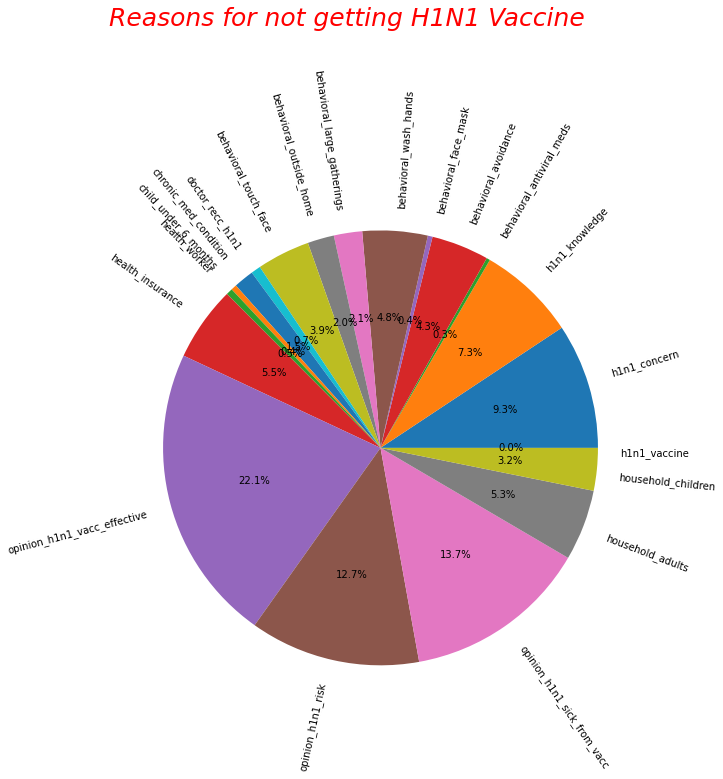

In [35]:
fig = plt.figure(figsize =(10, 10))

plt.pie(h1_vaccine_0_chart_values, labels = h1_vaccine_0_chart_labels, autopct='%1.1f%%',
       rotatelabels =True)
plt.title(label = "Reasons for not getting H1N1 Vaccine", 
          loc="left", fontstyle='italic', pad='150', color='red',
          fontsize = 25, fontweight=50)

plt.show()


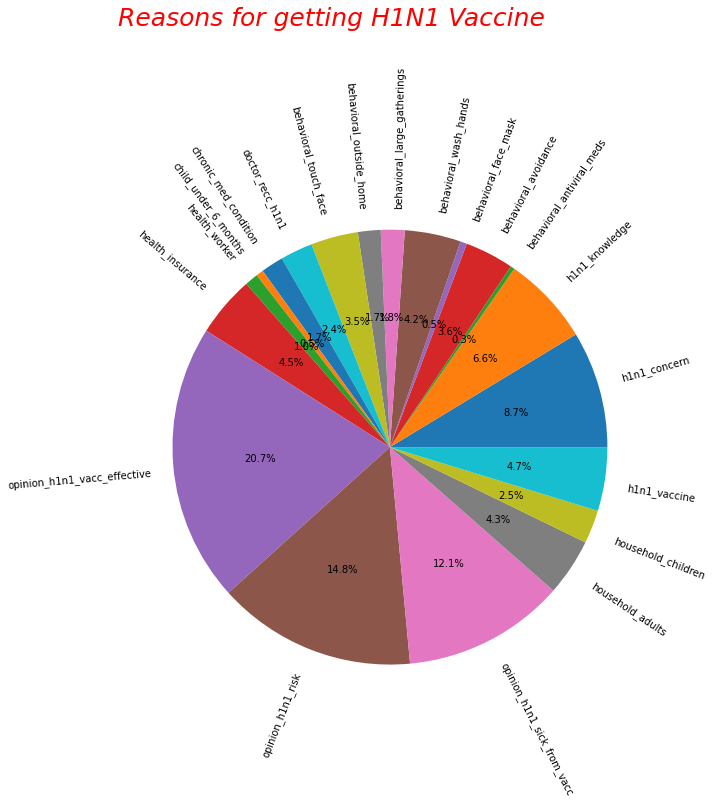

In [36]:
fig = plt.figure(figsize =(10, 10))

plt.pie(h1_vaccine_1_chart_values, labels = h1_vaccine_1_chart_labels, autopct='%1.1f%%',
       rotatelabels =True)
plt.title(label = "Reasons for getting H1N1 Vaccine", 
          loc="left", fontstyle='italic', pad='150', color='red',
          fontsize = 25, fontweight=50)

plt.show()


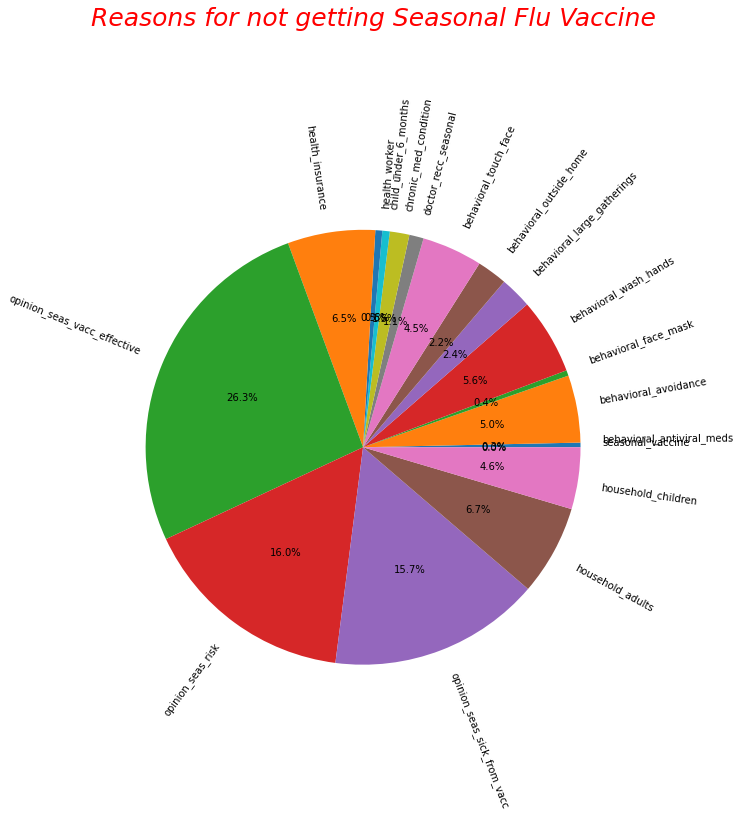

In [ ]:
fig = plt.figure(figsize =(10, 10))

plt.pie(sea_vaccine_0_chart_values, labels = sea_vaccine_0_chart_labels, autopct='%1.1f%%',
       rotatelabels =True)
plt.title(label = "Reasons for not getting Seasonal Flu Vaccine", 
          loc="left", fontstyle='italic', pad='150', color='red',
          fontsize = 25, fontweight=50)

plt.show()


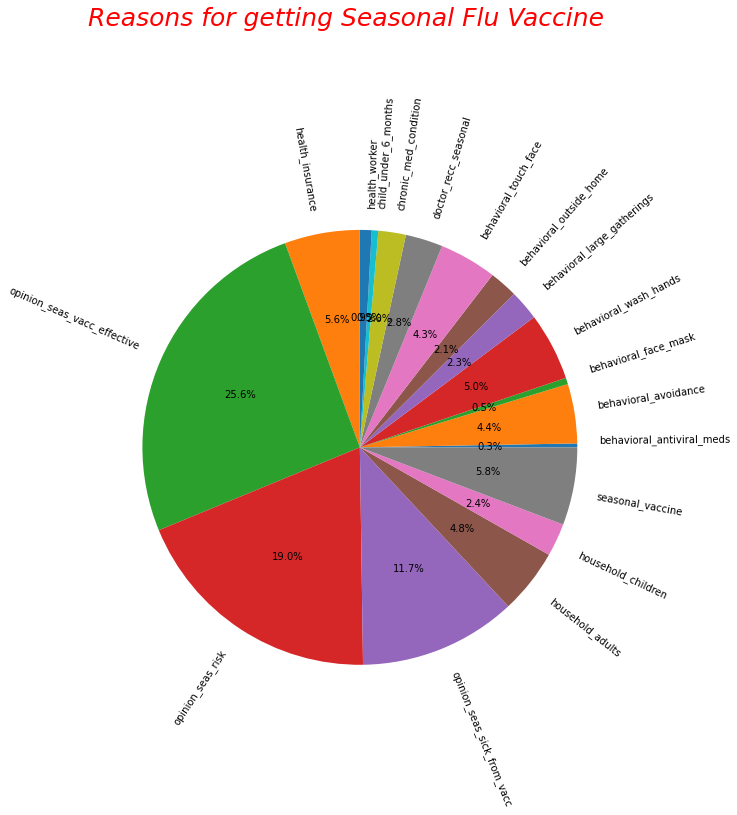

In [ ]:
fig = plt.figure(figsize =(10, 10))

plt.pie(sea_vaccine_1_chart_values, labels = sea_vaccine_1_chart_labels, autopct='%1.1f%%',
       rotatelabels =True)
plt.title(label = "Reasons for getting Seasonal Flu Vaccine", 
          loc="left", fontstyle='italic', pad='150', color='red',
          fontsize = 25, fontweight=50)

plt.show()


In [ ]:
training_features.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...             income_poverty  marital_status  \
0                    1.0  ...              Below Poverty     Not Married   
1                    1.0  ...              Below Poverty     Not Married   
2                    0.0  ...  <= $75,000, Above Poverty     Not Married   
3                    0.0  ...              Below Poverty     Not Married   
4                    1.0  ...  <= $75,000, Above Poverty         Married   

   rent_or_own   employment_status  hhs_geo_region                census_msa  \
0          Own  Not in Labor Force        oxchjgsf                   Non-MSA   
1         Rent            Employed        bhuqouqj  MSA, Not Principle  City   
2          Own            Employed        qufhixun  MSA, Not Principle  City   
3         Rent  Not in Labor Force        lrircsnp       MSA, Principle City   
4          Own            Employed        qufhixun  MSA, Not Principle  City   

   household_adults  household_children  employment_industry  \
0               0.0                 0.0                  NaN   
1               0.0                 0.0             pxcmvdjn   
2               2.0                 0.0             rucpziij   
3               0.0                 0.0                  NaN   
4               1.0                 0.0             wxleyezf   

   employment_occupation  
0                    NaN  
1               xgwztkwe  
2               xtkaffoo  
3                    NaN  
4               emcorrxb  

[5 rows x 36 columns]

In [ ]:
training_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26707 non-null  float64
 2   h1n1_knowledge               26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_h1n1             26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

In [ ]:
training_features.isnull().sum()

respondent_id                      0
h1n1_concern                       0
h1n1_knowledge                     0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                   0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance                   0
opinion_h1n1_vacc_effective        0
opinion_h1n1_risk                  0
opinion_h1n1_sick_from_vacc        0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [38]:
training_features.fillna('Unknown', inplace=True)
training_features.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [39]:
object_columns = training_features.select_dtypes(['object'])
object_columns.head()

age_group         education  ... employment_industry employment_occupation
0  55 - 64 Years        < 12 Years  ...             Unknown               Unknown
1  35 - 44 Years          12 Years  ...            pxcmvdjn              xgwztkwe
2  18 - 34 Years  College Graduate  ...            rucpziij              xtkaffoo
3      65+ Years          12 Years  ...             Unknown               Unknown
4  45 - 54 Years      Some College  ...            wxleyezf              emcorrxb

[5 rows x 12 columns]

In [40]:
training_features.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [ ]:
object_columns['education'].unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College',
       'Unknown'], dtype=object)

In [ ]:
object_columns['age_group'].unique()

array(['55 - 64', '35 - 44', '18 - 34', '65+', '45 - 54'], dtype=object)

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
encoded_values = onehot_encoder.fit_transform(training_features[['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation']]).toarray()


In [ ]:
encoded_values.shape

(26707, 89)

In [42]:
encoded_labels = onehot_encoder.categories_
#encoded_labels = onehot_encoder.categories_
#encoded_labels.shape
encoded_labels

[array(['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years',
        '65+ Years'], dtype=object),
 array(['12 Years', '< 12 Years', 'College Graduate', 'Some College',
        'Unknown'], dtype=object),
 array(['Black', 'Hispanic', 'Other or Multiple', 'White'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['<= $75,000, Above Poverty', '> $75,000', 'Below Poverty',
        'Unknown'], dtype=object),
 array(['Married', 'Not Married', 'Unknown'], dtype=object),
 array(['Own', 'Rent', 'Unknown'], dtype=object),
 array(['Employed', 'Not in Labor Force', 'Unemployed', 'Unknown'],
       dtype=object),
 array(['atmpeygn', 'bhuqouqj', 'dqpwygqj', 'fpwskwrf', 'kbazzjca',
        'lrircsnp', 'lzgpxyit', 'mlyzmhmf', 'oxchjgsf', 'qufhixun'],
       dtype=object),
 array(['MSA, Not Principle  City', 'MSA, Principle City', 'Non-MSA'],
       dtype=object),
 array(['Unknown', 'arjwrbjb', 'atmlpfrs', 'cfqqtusy', 'dotnnunm',
        'fcxhlnwr', 'haxffmxo', 'ldnlellj',

In [44]:
encoded_columns = []
for label in encoded_labels:
    for j in range(len(label)):
        encoded_columns.append(label[j])

In [45]:
encoded_data = pd.DataFrame(encoded_values, columns=encoded_columns)
encoded_data.head()

18 - 34 Years  35 - 44 Years  45 - 54 Years  ...  xqwwgdyp  xtkaffoo  xzmlyyjv
0            0.0            0.0            0.0  ...       0.0       0.0       0.0
1            0.0            1.0            0.0  ...       0.0       0.0       0.0
2            1.0            0.0            0.0  ...       0.0       1.0       0.0
3            0.0            0.0            0.0  ...       0.0       0.0       0.0
4            0.0            0.0            1.0  ...       0.0       0.0       0.0

[5 rows x 89 columns]

In [46]:
training_features.drop(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation', 'respondent_id'], axis=1, inplace=True)
final_df = pd.concat([training_features, encoded_data], axis=1)
final_df.head()

h1n1_concern  h1n1_knowledge  ...  xtkaffoo  xzmlyyjv
0           1.0             0.0  ...       0.0       0.0
1           3.0             2.0  ...       0.0       0.0
2           1.0             1.0  ...       1.0       0.0
3           1.0             1.0  ...       0.0       0.0
4           2.0             1.0  ...       0.0       0.0

[5 rows x 112 columns]

In [47]:
training_labels.drop('respondent_id', axis=1, inplace=True)

In [ ]:
training_labels.columns

Index(['h1n1_vaccine', 'seasonal_vaccine'], dtype='object')

In [48]:
training_features.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_adults               0
household_children             0
dtype: int64

# For H1N1

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_selector = RFE(estimator=LogisticRegression(), step = 1)
rfe_selector.fit(final_df, training_labels['h1n1_vaccine'])


In [50]:
final_df.columns[rfe_selector.get_support()]

Index(['behavioral_antiviral_meds', 'behavioral_large_gatherings',
       'doctor_recc_h1n1', 'doctor_recc_seasonal', 'child_under_6_months',
       'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       '18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '< 12 Years',
       'Black', 'Female', 'Male', '<= $75,000, Above Poverty', '> $75,000',
       'Below Poverty', 'Unknown', 'Married', 'Not Married', 'Unknown', 'Own',
       'Rent', 'Unknown', 'Employed', 'Not in Labor Force', 'Unemployed',
       'Unknown', 'MSA, Not Principle  City', 'MSA, Principle City', 'Non-MSA',
       'Unknown', 'arjwrbjb', 'atmlpfrs', 'cfqqtusy', 'dotnnunm', 'haxffmxo',
       'ldnlellj', 'mcubkhph', 'pxcmvdjn', 'rucpziij', 'vjjrobsf', 'wlfvacwt',
       'xqicxuve', 'cmhcxjea', 'dcjcmpih', 'dlvbwzss', 'hfxkjkmi', 'kldqjyjy',
       'pvmttkik', 'qxajmpny', 'rcertsgn', 'tfqavkke', 'ukymxvdu', 'uqqtjvyb'],
      dtype='object')

In [66]:
h1n1_training_set = final_df[final_df.columns[rfe_selector.get_support()]]
h1n1_training_set.head()
print(h1n1_training_set.shape)

(26707, 86)


In [ ]:
h1n1_training_set.columns

Index(['behavioral_antiviral_meds', 'behavioral_large_gatherings',
       'doctor_recc_h1n1', 'doctor_recc_seasonal', 'child_under_6_months',
       'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       '18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '< 12 Years',
       'Black', 'Female', 'Male', '<= $75,000, Above Poverty', '> $75,000',
       'Below Poverty', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown',
       'Unknown', 'Unknown', 'Married', 'Not Married', 'Unknown', 'Unknown',
       'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Own', 'Rent',
       'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown',
       'Unknown', 'Employed', 'Not in Labor Force', 'Unemployed', 'Unknown',
       'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown',
       'MSA, Not Principle  City', 'MSA, Principle City', 'Non-MSA', 'Unknown',
       'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown',
       'arjwrbjb', 'atmlp

In [52]:
x_train_h1n1, x_test_h1n1, y_train_h1n1, y_test_h1n1 = train_test_split(h1n1_training_set, training_labels['h1n1_vaccine'], random_state=42)

In [54]:
log_reg = LogisticRegression()
log_reg.fit(x_train_h1n1, y_train_h1n1)
y_pred = log_reg.predict(x_test_h1n1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(y_test_h1n1, y_pred)
print(confusion_matrix)


[[5014  246]
 [ 828  589]]


In [56]:
print(classification_report(y_test_h1n1, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5260
           1       0.71      0.42      0.52      1417

    accuracy                           0.84      6677
   macro avg       0.78      0.68      0.71      6677
weighted avg       0.83      0.84      0.82      6677



# For Seasonal-Flu

In [ ]:

rfe_selector_flu = RFE(estimator=LogisticRegression(), step = 1)
rfe_selector_flu.fit(final_df, training_labels['seasonal_vaccine'])


In [67]:
len(final_df.columns[rfe_selector_flu.get_support()])

56

In [59]:
flu_training_set = final_df[final_df.columns[rfe_selector_flu.get_support()]]
print(flu_training_set.shape)
flu_training_set.head()

(26707, 80)


h1n1_knowledge  behavioral_touch_face  ...  vlluhbov  xgwztkwe
0             0.0                    1.0  ...       0.0       0.0
1             2.0                    1.0  ...       0.0       1.0
2             1.0                    0.0  ...       0.0       0.0
3             1.0                    0.0  ...       0.0       0.0
4             1.0                    1.0  ...       0.0       0.0

[5 rows x 80 columns]

In [68]:
x_train_flu, x_test_flu, y_train_flu, y_test_flu = train_test_split(flu_training_set, training_labels['seasonal_vaccine'], random_state=42)

In [69]:
log_reg_flu = LogisticRegression()
log_reg_flu.fit(x_train_flu, y_train_flu)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
y_pred_flu = log_reg_flu.predict(x_test_flu)

In [71]:
y_pred_flu

array([0, 0, 1, ..., 0, 0, 1])

In [73]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix_flu = confusion_matrix(y_test_flu, y_pred_flu)

print(confusion_matrix_flu)
print(classification_report(y_test_flu, y_pred_flu))

[[2976  658]
 [ 763 2280]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      3634
           1       0.78      0.75      0.76      3043

    accuracy                           0.79      6677
   macro avg       0.79      0.78      0.78      6677
weighted avg       0.79      0.79      0.79      6677



**Using KNN-Imputer**


In [77]:
training_features = pd.read_csv(training_features_url)
training_labels = pd.read_csv(training_label_url)

test_features = pd.read_csv(test_features_url)